In [0]:
!pip install -U -q PyDrive

In [0]:
# Install the PyDrive wrapper & import libraries.
# This only needs to be done once per notebook.
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once per notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Download a file based on its file ID.
# A file ID looks like: laggVyWshwcyP6kEI-y_W3P8D26sz
file1 = drive.CreateFile({'id': '1DpVBNFx0Du3vH4COXxzK34JoeVaX-gO_'})
file2 = drive.CreateFile({'id': '1Wg3kgFoqA0m2s3uS3IXVWmas3aNwIjVf'})
file3 = drive.CreateFile({'id': '1ftMjSJ8UUgRA1rLBYJYi0B2ScWPkCUQE'})
file4 = drive.CreateFile({'id': '1bWfC5USBFA6PiBVRrB9FVhTH7HI3fNRL'})
file5 = drive.CreateFile({'id': '1Q2XyOR0EMiBKCoJ1rOs5GurlJa0deAsF'})
file6 = drive.CreateFile({'id': '1EZC4S3IohObh8dDgsF8pl8tRiooLNsTD'})
file7 = drive.CreateFile({'id': '102JGovF7fqFZMpGC8QMrQF4cWwNsDx3H'})
file8 = drive.CreateFile({'id': '1kU8fZYEKPVfC5nhLgMxE4gTZpGr4J40o'})
file9 = drive.CreateFile({'id': '1_xWtU99NtDhVImp1hYZCuz-EmUykhdQA'})
#file10 = drive.CreateFile({'id': file10_id})
a1=file1.GetContentString()
a2=file2.GetContentString()
a3=file3.GetContentString()
a4=file4.GetContentString()
a5=file5.GetContentString()
a6=file6.GetContentString()
a7=file7.GetContentString()
a8=file8.GetContentString()
a9=file9.GetContentString()
#a10=file10.GetContentString()
#print(a)

In [19]:
# to know size of h
h=0
def compute_h(a):
  b=a.split('\n')
  for i in range(0,len(b)):
    if len(b[i])==0 :
      del b[i]
  return len(b)
h=h+compute_h(a1)+compute_h(a2)+compute_h(a3)+compute_h(a4)+compute_h(a5)+compute_h(a6)+compute_h(a7)+compute_h(a8)+compute_h(a9)
print(h)

7201


In [20]:
import numpy as np
import pylab as plt
x=np.zeros((h,200,200,1))
y=np.zeros((h,1))
ii=0
array = []

def putting_data_in_array(a):
  b=a.split('\n')
  for i in range(0,len(b)):
    if len(b[i])==0 :
      del b[i]
  print(len(b))
  for line in b: # read rest of lines
    array.append([float(x) for x in line.split(',')])

def assign_values_x_y(array,indx):
  global x
  global y
  for i in range(0+indx,len(array)+indx):
    a=array[i-indx][0:200*200]
    x[i,:,:,0]=np.reshape(a,(200,200))
    y[i][0]=array[i-indx][(200*200)]
  return len(array)

putting_data_in_array(a1)
a1=None
ii=ii+assign_values_x_y(array,ii)
array=[]

putting_data_in_array(a2)
a2=None
ii=ii+assign_values_x_y(array,ii)
array=[]

putting_data_in_array(a3)
a3=None
ii=ii+assign_values_x_y(array,ii)
array=[]

putting_data_in_array(a4)
a4=None
ii=ii+assign_values_x_y(array,ii)
array=[]

putting_data_in_array(a5)
a5=None
ii=ii+assign_values_x_y(array,ii)
array=[]

putting_data_in_array(a6)
a6=None
ii=ii+assign_values_x_y(array,ii)
array=[]

putting_data_in_array(a7)
a7=None
ii=ii+assign_values_x_y(array,ii)
array=[]

putting_data_in_array(a8)
a8=None
ii=ii+assign_values_x_y(array,ii)
array=[]

putting_data_in_array(a9)
a9=None
ii=ii+assign_values_x_y(array,ii)
array=[]

801
800
800
800
800
800
800
800
800


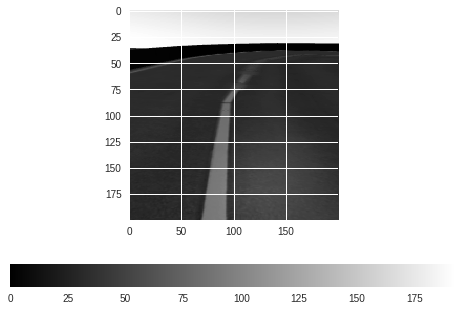

In [21]:
im = plt.imshow(x[205,:,:,0], cmap='gray')
plt.colorbar(im, orientation='horizontal')
plt.show()

In [0]:
import math
import numpy as np
import h5py
import matplotlib.pyplot as plt
import scipy
from scipy import ndimage
import tensorflow as tf
from tensorflow.python.framework import ops

In [0]:
def create_placeholders(n_H0, n_W0, n_C0, n_y):
    X = tf.placeholder(tf.float32, [None, n_H0, n_W0, n_C0])
    Y = tf.placeholder(tf.float32, [None, n_y])
    return X, Y

In [0]:
def initialize_parameters():
    W1 = tf.get_variable("W1", [5, 5, 1, 24], initializer=tf.contrib.layers.xavier_initializer())
    W2 = tf.get_variable("W2", [5, 5, 24, 36], initializer=tf.contrib.layers.xavier_initializer())
    W3 = tf.get_variable("W3", [5, 5, 36, 48], initializer=tf.contrib.layers.xavier_initializer())
    W4 = tf.get_variable("W4", [3, 3, 48, 64], initializer=tf.contrib.layers.xavier_initializer())
    W5 = tf.get_variable("W5", [3, 3, 64, 76], initializer=tf.contrib.layers.xavier_initializer())
    
    W6 = tf.get_variable("W6", [100, 47500], initializer = tf.contrib.layers.xavier_initializer())
    b6 = tf.get_variable("b6", [100, 1], initializer = tf.zeros_initializer())
    W7 = tf.get_variable("W7", [50, 100], initializer = tf.contrib.layers.xavier_initializer())
    b7 = tf.get_variable("b7", [50, 1], initializer = tf.zeros_initializer())
    W8 = tf.get_variable("W8", [10, 50], initializer = tf.contrib.layers.xavier_initializer())
    b8 = tf.get_variable("b8", [10, 1], initializer = tf.zeros_initializer())
    W9 = tf.get_variable("W9", [1, 10], initializer = tf.contrib.layers.xavier_initializer())
    b9 = tf.get_variable("b9", [1, 1], initializer = tf.zeros_initializer())
    parameters = {"W1":W1,"W2":W2,"W3":W3,"W4":W4,"W5":W5,"W6":W6,"W7":W7,"W8":W8,"W9":W9,"b6":b6,"b7":b7,"b8":b8,"b9":b9}
    return parameters

In [0]:
def forward_propagation(X, parameters):
    W1 = parameters['W1']
    W2 = parameters['W2']
    W3 = parameters['W3']
    W4 = parameters['W4']
    W5 = parameters['W5']
    W6 = parameters['W6']
    W7 = parameters['W7']
    W8 = parameters['W8']
    W9 = parameters['W9']
    b6 = parameters['b6']
    b7 = parameters['b7']
    b8 = parameters['b8']
    b9 = parameters['b9']
    
    print(X.shape)
    Z1 = tf.nn.conv2d(X, W1, strides=[1, 2, 2, 1], padding='SAME')
    A1 = tf.nn.relu(Z1)
    print(A1.shape)
    Z2 = tf.nn.conv2d(A1, W2, strides=[1, 2, 2, 1], padding='SAME')
    A2 = tf.nn.relu(Z2)
    print(A2.shape)
    Z3 = tf.nn.conv2d(A2, W3, strides=[1, 2, 2, 1], padding='SAME')
    A3 = tf.nn.relu(Z3)
    print(A3.shape)
    Z4 = tf.nn.conv2d(A3, W4, strides=[1, 1, 1, 1], padding='SAME')
    A4 = tf.nn.relu(Z4)
    print(A4.shape)
    Z5 = tf.nn.conv2d(A4, W5, strides=[1, 1, 1, 1], padding='SAME')
    A5 = tf.nn.relu(Z5)
    print(A5.shape)
    
    P = tf.transpose(tf.contrib.layers.flatten(A5))
    print(P.shape)
    print(W6.shape)
    
    Z6 = tf.add(tf.matmul(W6, P), b6)
    A6 = tf.nn.relu(Z6)
    print(A6.shape)
    Z7 = tf.add(tf.matmul(W7, A6), b7)
    A7 = tf.nn.relu(Z7)
    print(A7.shape)
    Z8 = tf.add(tf.matmul(W8, A7), b8) 
    A8 = tf.nn.relu(Z8)
    print(A8.shape)
    Z9 = tf.add(tf.matmul(W9, A8), b9)
    print(Z9.shape)
    return Z9

In [0]:
def compute_cost(Z3, Y):
    cost=tf.reduce_sum(tf.losses.absolute_difference(labels=Y,predictions=Z3))
    #cost=tf.reduce_sum(tf.multiply(Y, tf.log(Z3)) + tf.multiply(1 - Y, tf.log(1 - Z3)))
    
    return cost

In [0]:
def random_mini_batches(X, Y, mini_batch_size = 64):
    m = X.shape[0]                  # number of training examples
    mini_batches = []

    permutation = list(np.random.permutation(m))
    shuffled_X = X[permutation,:]
    shuffled_Y = Y[permutation,:].reshape((m,1))

    num_complete_minibatches = int(math.floor(m/mini_batch_size)) 
    for k in range(0, num_complete_minibatches):
        mini_batch_X = shuffled_X[k * mini_batch_size:(k + 1) * mini_batch_size,:,:,:]
        mini_batch_Y = shuffled_Y[k * mini_batch_size:(k + 1) * mini_batch_size,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
    
    if m % mini_batch_size != 0:
        end = m - mini_batch_size * math.floor(m / mini_batch_size)
        mini_batch_X = shuffled_X[num_complete_minibatches * mini_batch_size:,:,:,:]
        mini_batch_Y = shuffled_Y[num_complete_minibatches * mini_batch_size:,:]
        mini_batch = (mini_batch_X, mini_batch_Y)
        mini_batches.append(mini_batch)
        
    return mini_batches

In [0]:
def model(X_train, Y_train, learning_rate=0.009,num_epochs=100, minibatch_size=64, print_cost=True):
    Y_train=Y_train*180/3.14
    ops.reset_default_graph()                 # to be able to rerun the model without overwriting tf variables
    (m, n_H0, n_W0, n_C0) = X_train.shape             
    n_y = Y_train.shape[1]                            
    costs = []
    
    X, Y = create_placeholders(n_H0, n_W0, n_C0, n_y)
    print("create_placeholders done")
    parameters = initialize_parameters()
    print("initialize_parameters done")
    Z3 = forward_propagation(X, parameters)
    print("forward_propagation done")
    cost = compute_cost(Z3, Y)
    print("compute_cost done")
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)
    print("AdamOptimizer done")
    
    init = tf.global_variables_initializer()
    print("init done")
    with tf.Session() as sess:
        sess.run(init)
        #for num_of_itera in range (0,5):
          #print("iteration number = %i" % (num_of_itera))
        for epoch in range(num_epochs):
            minibatch_cost = 0.
            num_minibatches = int(m / minibatch_size)
            minibatches = random_mini_batches(X_train, Y_train, minibatch_size)
            for minibatch in minibatches:
                (minibatch_X, minibatch_Y) = minibatch
                _ , temp_cost = sess.run([optimizer, cost], feed_dict={X:minibatch_X, Y:minibatch_Y})
                minibatch_cost += temp_cost / num_minibatches

            if print_cost == True and epoch % 5 == 0:
                print ("Cost after epoch %i: %f" % (epoch, minibatch_cost))
            if print_cost == True and epoch % 1 == 0:
                costs.append(minibatch_cost)
        
        # plot the cost
        plt.plot(np.squeeze(costs))
        plt.ylabel('cost')
        plt.xlabel('iterations (per tens)')
        plt.title("Learning rate =" + str(learning_rate))
        plt.show()
        
        # Calculate accuracy on the test set
        #accuracy = (1/Y.shape[0])*( np.sum(np.absolute(Y-Z3)) )
        #print(accuracy)
        #train_accuracy = accuracy.eval({X: X_train, Y: Y_train})
        #print("Train Accuracy:", train_accuracy)
        
        return parameters

create_placeholders done
initialize_parameters done
(?, 200, 200, 1)
(?, 100, 100, 24)
(?, 50, 50, 36)
(?, 25, 25, 48)
(?, 25, 25, 64)
(?, 25, 25, 76)
(47500, ?)
(100, 47500)
(100, ?)
(50, ?)
(10, ?)
(1, ?)
forward_propagation done
compute_cost done
AdamOptimizer done
init done
Cost after epoch 0: 65.786603
Cost after epoch 5: 2.022233
Cost after epoch 10: 2.019325
Cost after epoch 15: 2.022494
Cost after epoch 20: 2.019463
Cost after epoch 25: 2.023629
Cost after epoch 30: 2.020566
Cost after epoch 35: 2.022456
Cost after epoch 40: 2.022574
Cost after epoch 45: 2.022081
Cost after epoch 50: 2.022702
Cost after epoch 55: 2.022126
Cost after epoch 60: 2.022766
Cost after epoch 65: 2.021784
Cost after epoch 70: 2.021874
Cost after epoch 75: 2.023101
Cost after epoch 80: 2.021425
Cost after epoch 85: 2.026401
Cost after epoch 90: 2.021655
Cost after epoch 95: 2.020571


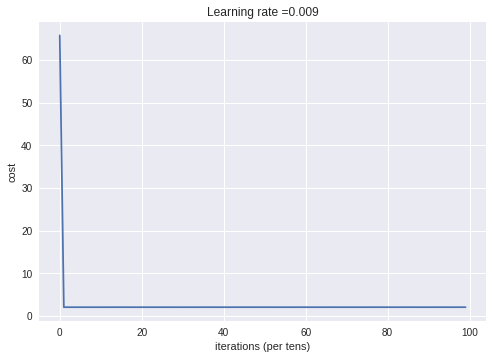

In [29]:
parameters = model(x, y)

In [33]:
print(parameters)

{'W1': <tf.Variable 'W1:0' shape=(5, 5, 1, 24) dtype=float32_ref>, 'W2': <tf.Variable 'W2:0' shape=(5, 5, 24, 36) dtype=float32_ref>, 'W3': <tf.Variable 'W3:0' shape=(5, 5, 36, 48) dtype=float32_ref>, 'W4': <tf.Variable 'W4:0' shape=(3, 3, 48, 64) dtype=float32_ref>, 'W5': <tf.Variable 'W5:0' shape=(3, 3, 64, 76) dtype=float32_ref>, 'W6': <tf.Variable 'W6:0' shape=(100, 47500) dtype=float32_ref>, 'W7': <tf.Variable 'W7:0' shape=(50, 100) dtype=float32_ref>, 'W8': <tf.Variable 'W8:0' shape=(10, 50) dtype=float32_ref>, 'W9': <tf.Variable 'W9:0' shape=(1, 10) dtype=float32_ref>, 'b6': <tf.Variable 'b6:0' shape=(100, 1) dtype=float32_ref>, 'b7': <tf.Variable 'b7:0' shape=(50, 1) dtype=float32_ref>, 'b8': <tf.Variable 'b8:0' shape=(10, 1) dtype=float32_ref>, 'b9': <tf.Variable 'b9:0' shape=(1, 1) dtype=float32_ref>}
